In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("로드킬.csv", encoding = "cp949")

In [ ]:
data

,본부명,지사명,노선명,구간,방 향,5km,발생건수,위도,경도
0,강원,홍천,중앙선,315~320,부산,315,13,37.340987,127.912591
1,강원,홍천,중앙선,315~320,춘천,315,7,37.340987,127.912591
2,강원,홍천,중앙선,385~390,춘천,385,6,37.838769,127.777996
3,강원,강릉,동해선,65~70,속초,65,4,37.802916,128.823887
4,강원,대관령,영동선,230~235,인천,230,4,37.754931,128.796506
...,...,...,...,...,...,...,...,...,...
114,충북,진천,중부선,315~320,통영,315,3,37.163088,127.440035
115,충북,진천,중부선,320~325,통영,320,3,37.207765,127.442214
116,충북,진천,중부선,255~260,통영,255,3,36.666547,127.424086
117,충북,진천,중부선,265~270,통영,265,3,36.745619,127.469129


In [ ]:
data1 = pd.read_csv("로드킬1.csv")

In [ ]:
data1 = data1.dropna()


In [ ]:
data1

,종명,접수일시,도로유형,도로명
0,고양이,2020-01-01,국도,29
1,고라니,2020-01-01,국도,일반국도39호선
2,고라니,2020-01-02,국도,일반국도32호선
3,고라니,2020-01-02,국도,17
4,어치,2020-01-02,국도,5
...,...,...,...,...
15091,고양이,2020-12-31,국도,6
15092,삵,2020-12-31,국도,28
15093,고라니,2020-12-31,국도,28
15094,고라니,2020-12-31,국도,42


In [ ]:
print(data.columns)

Index([' 본부명 ', ' 지사명 ', ' 노선명 ', ' 구간 ', ' 방 향 ', ' 5km ', ' 발생건수 ', '위도',
       '경도'],
      dtype='object')


In [ ]:
grouped = data.groupby(' 지사명 ')[' 발생건수 '].sum().reset_index()
grouped.columns = [' 지사명 ', ' 발생건수 ']

In [ ]:
data[" 지사명 "]

0       홍천
1       홍천
2       홍천
3       강릉
4      대관령
      ... 
114     진천
115     진천
116     진천
117     진천
118     진천
Name:  지사명 , Length: 119, dtype: object

In [ ]:
sorted_grouped = grouped.sort_values(by = ' 발생건수 ', ascending = False)

In [ ]:
print(sorted_grouped)

    지사명    발생건수 
27    진천      72
31    홍천      47
2     공주      31
8     대전      28
30    함평      27
24    제천      23
19    엄정      19
4     논산      16
22    원주      16
29    천안      14
6     당진      13
20    영동      13
18    시흥      13
3     남원      12
1   경기광주      11
17    순천      10
0     강릉      10
7    대관령      10
14    부여       8
12    보은       7
13    부안       6
21    영주       6
11    보령       6
25    진안       6
9    동서울       4
15   서울산       3
23    전주       3
10    무주       3
26    진주       3
28    창원       3
5     담양       3
16    수원       3


In [ ]:
import matplotlib.pyplot as plt


In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,740 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120903 files and dire

In [16]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

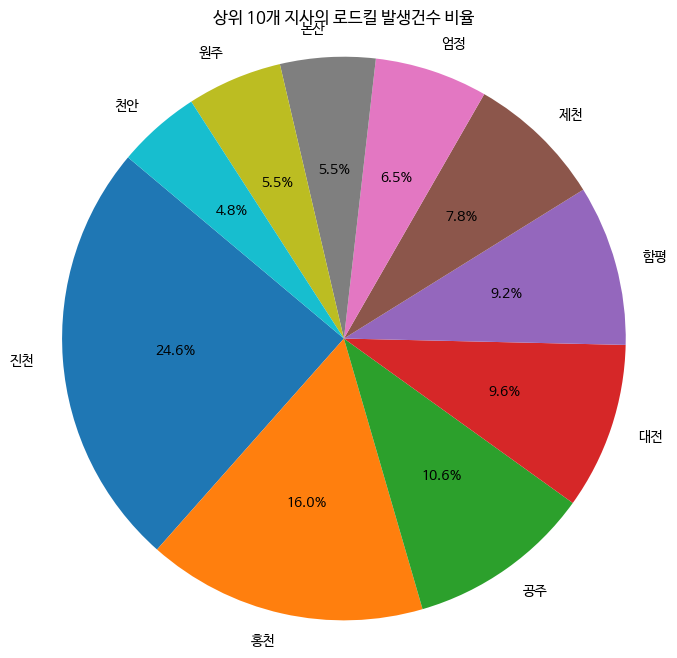

In [ ]:
# 발생건수를 기준으로 내림차순 정렬 후 상위 10개 추출
top_10 = sorted_grouped.head(10)

# 원그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(top_10[' 발생건수 '], labels=top_10[' 지사명 '], autopct='%1.1f%%', startangle=140)
plt.title('상위 10개 지사의 로드킬 발생건수 비율')
plt.axis('equal')  # 원의 모양을 유지
plt.show()

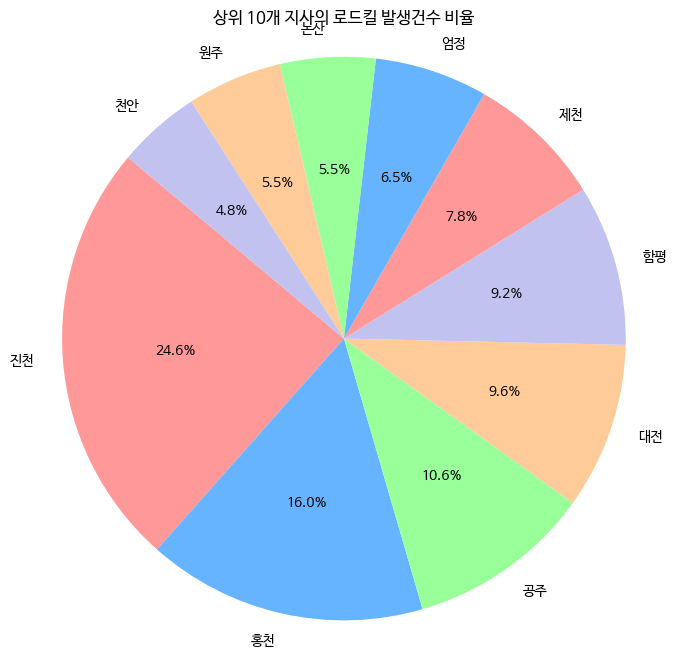

In [ ]:
# 사용할 색상 팔레트 지정
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# 원그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(top_10[' 발생건수 '], labels=top_10[' 지사명 '], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('상위 10개 지사의 로드킬 발생건수 비율')
plt.axis('equal')  # 원의 모양을 유지
plt.show()

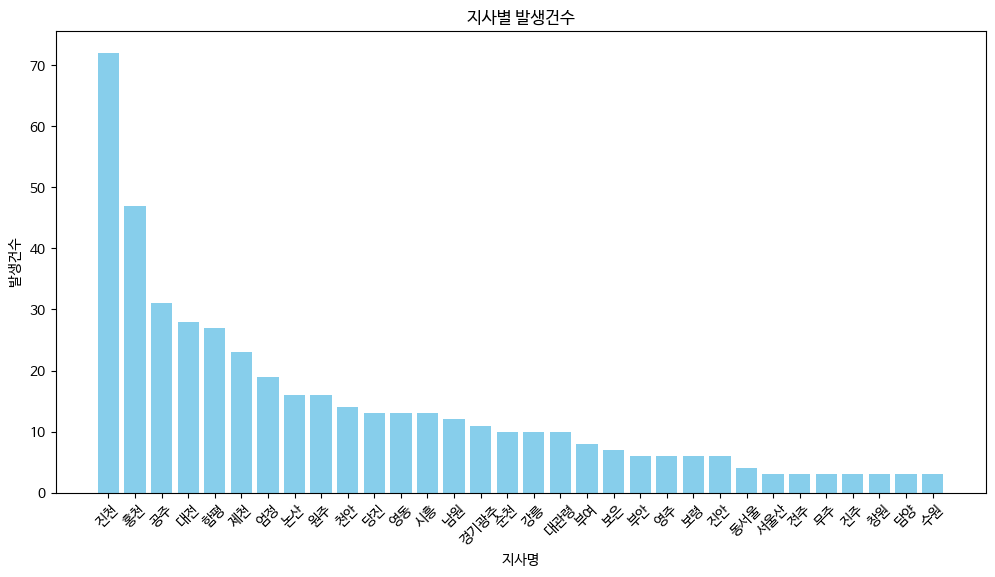

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 6))  # 그래프 크기 조정

# 막대그래프 그리기
plt.bar(sorted_grouped[' 지사명 '], sorted_grouped[' 발생건수 '], color='skyblue')

plt.title('지사별 발생건수')  # 그래프 제목
plt.xlabel(' 지사명 ')  # x축 라벨
plt.ylabel(' 발생건수 ')  # y축 라벨

plt.xticks(rotation=45)  # x축 라벨 텍스트 회전

plt.show()  # 그래프 출력

In [ ]:
data1

,종명,접수일시,도로유형,도로명
0,고양이,2020-01-01,국도,29
1,고라니,2020-01-01,국도,일반국도39호선
2,고라니,2020-01-02,국도,일반국도32호선
3,고라니,2020-01-02,국도,17
4,어치,2020-01-02,국도,5
...,...,...,...,...
15091,고양이,2020-12-31,국도,6
15092,삵,2020-12-31,국도,28
15093,고라니,2020-12-31,국도,28
15094,고라니,2020-12-31,국도,42


In [ ]:
# 중복 제거한 종명 확인
unique_species = data1['종명'].unique()
print(unique_species)

['고양이' '고라니' '어치' '멧돼지' '너구리' '닭' '개' '족제비' '매' '들꿩' '까마귀' '삵' '두더지' '오소리'
 '다람쥐' '토끼' '청설모' '흰배지빠귀' '사슴' '오리' '미동정' '원앙' '두루미' '수달' '파랑새' '참새' '부엉이'
 '곤줄박이' '시궁쥐' '미동정(조류)' '동박새' '꿩' '독수리' '노루' '미동정(포유류)' '새' '황소개구리' '청둥오리'
 '털발말똥가리' '수리부엉이' '멧비둘기' '멧토끼' '말똥가리' '집비둘기' '올빼미' '긴점박이올빼미' '붉은배새매'
 '황조롱이' '담비' '염소' '두꺼비' '검은등제비갈매기' '까치' '흰뺨검둥오리' '붉은왜가리' '집오리' '갈매기'
 '유혈목이' '큰부리까마귀' '직박구리' '바다직박구리' '가창오리' '개꿩' '중백로' '구렁이' '쇠백로' '참매'
 '미동정(파충류)' '누룩뱀' '붉은해오라기' '검둥오리' '고슴도치' '호반새' '쏙독새' '쇠살모사' '새매' '메추라기'
 '살모사' '자라' '긴꼬리때까치' '검은등뻐꾸기' '노랑부리백로' '슴새' '왜가리' '뻐꾸기' '검은댕기해오라기' '종다리'
 '큰뒷부리도요' '능구렁이' '물닭']


In [ ]:
len(unique_species)

90

In [ ]:
# 종명 별로 그룹화하고 합산 값을 구함
result = data1.groupby('종명').size().reset_index(name='발생건수')

# 합산값을 높은 순서대로 정렬
result_sorted = result.sort_values(by='발생건수', ascending=False)

# 결과 출력
print(result_sorted)

       종명  발생건수
8     고라니  6864
10    고양이  3008
18    너구리  1415
2       개   654
20     노루   610
..    ...   ...
54    쇠백로     1
58     슴새     1
59    시궁쥐     1
60    쏙독새     1
45  붉은배새매     1

[90 rows x 2 columns]


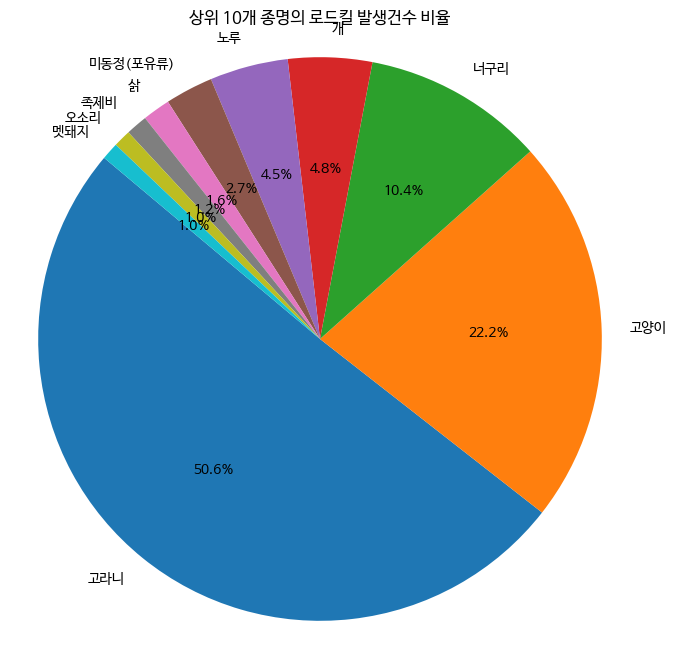

In [ ]:
# 발생건수를 기준으로 내림차순 정렬 후 상위 10개 추출
top_10 = result_sorted.head(10)

# 원그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(top_10['발생건수'], labels=top_10['종명'], autopct='%1.1f%%', startangle=140)
plt.title('상위 10개 종명의 로드킬 발생건수 비율')
plt.axis('equal')  # 원의 모양을 유지
plt.show()

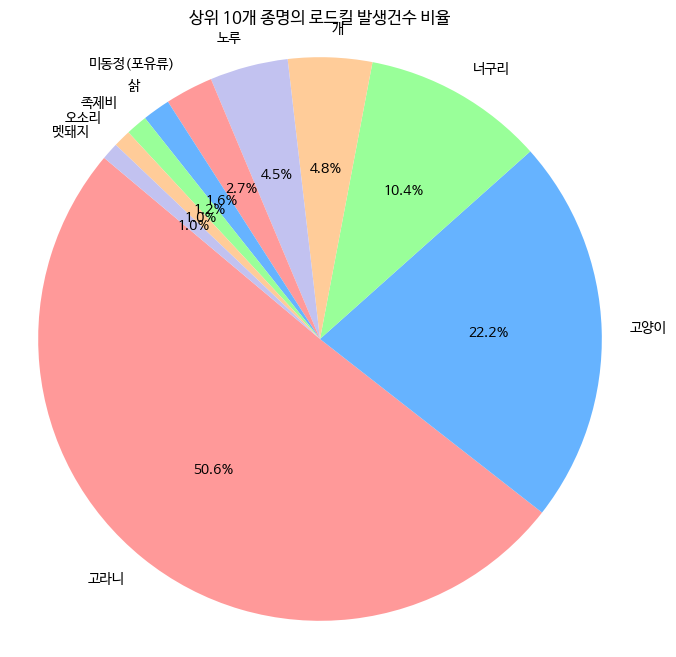

In [ ]:
# 발생건수를 기준으로 내림차순 정렬 후 상위 10개 추출
top_10 = result_sorted.head(10)

# 사용할 색상 팔레트 지정
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# 원그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(top_10['발생건수'], labels=top_10['종명'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('상위 10개 종명의 로드킬 발생건수 비율')
plt.axis('equal')  # 원의 모양을 유지
plt.show()

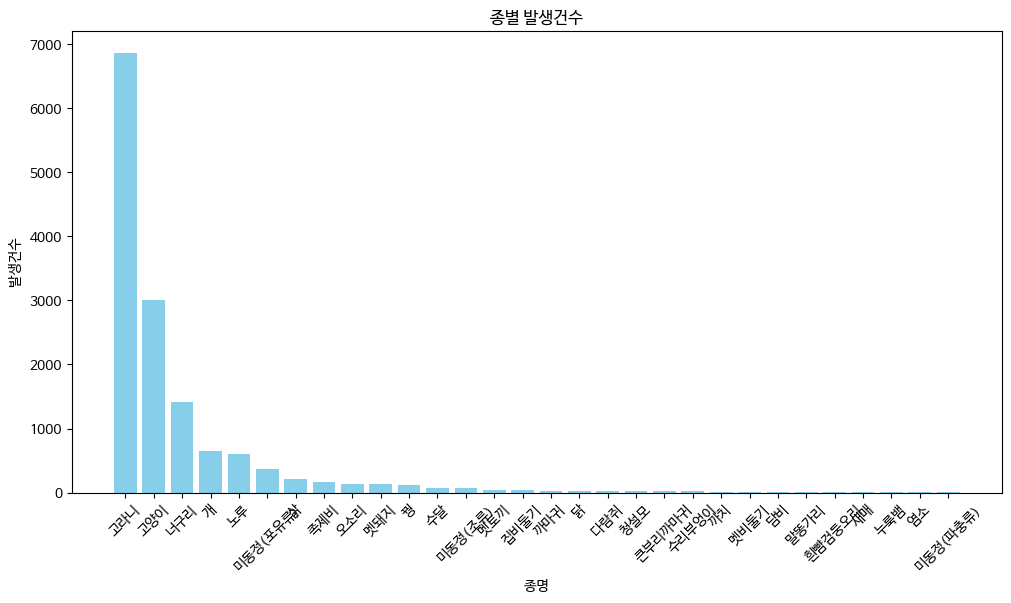

In [ ]:
import matplotlib.pyplot as plt

# 발생건수를 기준으로 내림차순 정렬 후 상위 10개 추출
top_30 = result_sorted.head(30)

# 시각화
plt.figure(figsize=(12, 6))  # 그래프 크기 조정

# 막대그래프 그리기
plt.bar(top_30['종명'], top_30['발생건수'], color='skyblue')

plt.title('종별 발생건수')  # 그래프 제목
plt.xlabel(' 종명 ')  # x축 라벨
plt.ylabel(' 발생건수 ')  # y축 라벨

plt.xticks(rotation=45)  # x축 라벨 텍스트 회전

plt.show()  # 그래프 출력

In [ ]:
import pandas as pd

In [ ]:
#멸종위기 종만 뽑아내기
data20 = pd.read_csv("로드킬(멸종).csv", encoding = "cp949")

In [ ]:
data20

,종명,접수일시,도로유형,도로명
0,삵,2020-02-27,지방도,1023
1,삵,2020-04-10,국도,17
2,다람쥐,2020-04-18,시도,죽령교
3,다람쥐,2020-04-20,시도,영단로
4,사슴,2020-05-06,국도,17
...,...,...,...,...
391,삵,2020-12-24,국도,5
392,삵,2020-12-26,고속국도(재정),15
393,수달,2020-12-27,국도,45
394,삵,2020-12-28,시도,대송로


In [ ]:
# 종명 별로 그룹화하고 합산 값을 구함
result = data20.groupby('종명').size().reset_index(name='발생건수')

# 합산값을 높은 순서대로 정렬
result_sorted = result.sort_values(by='발생건수', ascending=False)

# 결과 출력
print(result_sorted)

         종명  발생건수
13        삵   216
15       수달    76
4       다람쥐    27
16    수리부엉이    20
5        담비    15
8      말똥가리    10
14       새매     9
2   긴점박이올빼미     4
0       갈매기     3
6       독수리     2
9       부엉이     2
17      올빼미     2
20   큰뒷부리도요     1
19       참매     1
18      종다리     1
11   붉은해오라기     1
12       사슴     1
1       구렁이     1
10    붉은배새매     1
7       두루미     1
3    노랑부리백로     1
21      호반새     1


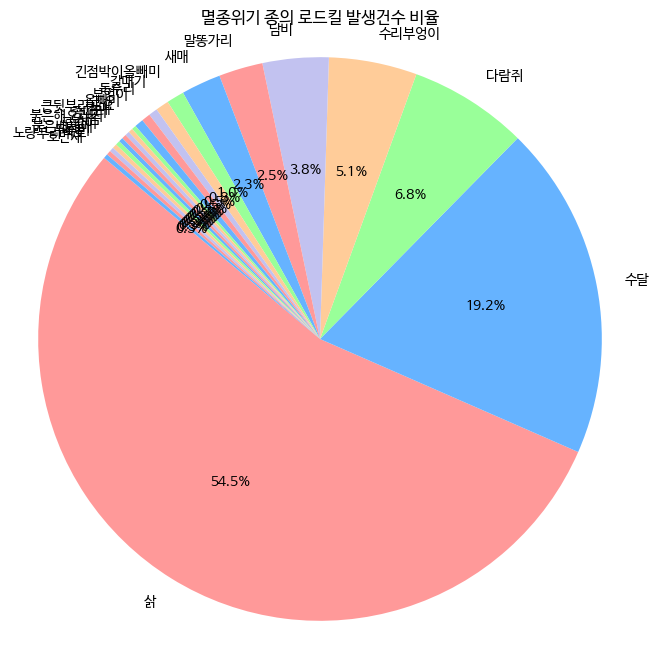

In [ ]:
# 사용할 색상 팔레트 지정
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# 원그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(result_sorted['발생건수'], labels=result_sorted['종명'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('멸종위기 종의 로드킬 발생건수 비율')
plt.axis('equal')  # 원의 모양을 유지
plt.show()

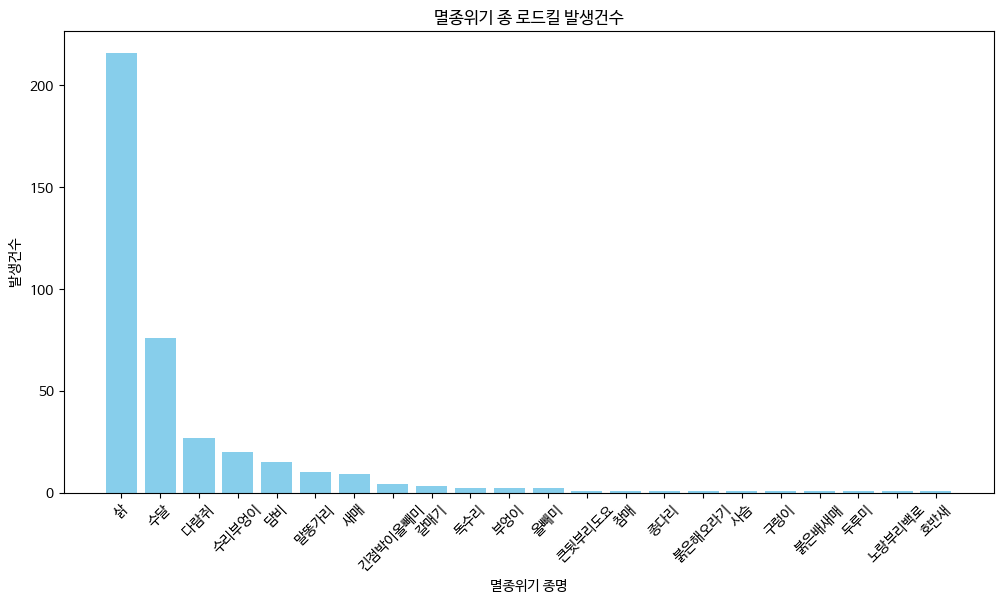

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 6))  # 그래프 크기 조정

# 막대그래프 그리기
plt.bar(result_sorted['종명'], result_sorted['발생건수'], color='skyblue')

plt.title('멸종위기 종 로드킬 발생건수')  # 그래프 제목
plt.xlabel(' 멸종위기 종명 ')  # x축 라벨
plt.ylabel(' 발생건수 ')  # y축 라벨

plt.xticks(rotation=45)  # x축 라벨 텍스트 회전

plt.show()  # 그래프 출력

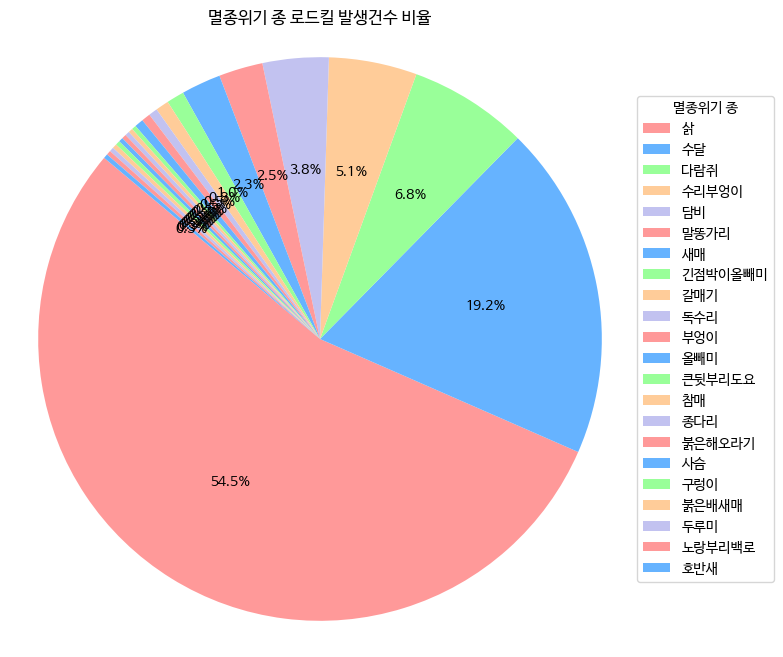

In [ ]:
# 원그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(result_sorted['발생건수'], labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('멸종위기 종 로드킬 발생건수 비율')

# 라벨 표시
plt.legend(result_sorted['종명'], title='멸종위기 종', loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')  # 원의 모양을 유지
plt.show()

In [ ]:
# 도로유형과 도로명 별로 그룹화하고 합산 값을 구함
result = data20.groupby(['도로유형', '도로명']).size().reset_index(name='발생건수')
# 합산값을 높은 순서대로 정렬
result_sorted = result.sort_values(by='발생건수', ascending=False)

# 결과 출력
print(result_sorted)

         도로유형       도로명  발생건수
43         국도        34    20
26         국도        17    16
55         국도         5    15
56         국도         6    15
39         국도         3    15
..        ...       ...   ...
15   고속국도(재정)   서해안고속도로     1
90         국도  일반국도42호선     1
91         국도  일반국도43호선     1
94         국도   일반국도4호선     1
130      지방도       1021     1

[131 rows x 3 columns]


In [ ]:
result_sorted = result_sorted.head(20)

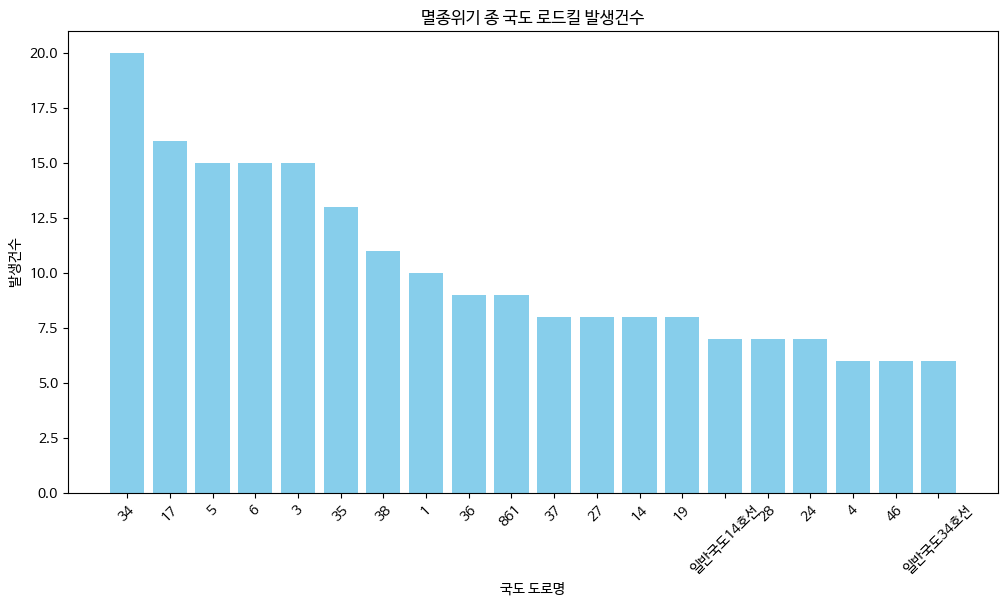

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 6))  # 그래프 크기 조정

# 막대그래프 그리기
plt.bar(result_sorted['도로명'], result_sorted['발생건수'], color='skyblue')

plt.title('멸종위기 종 국도 로드킬 발생건수')  # 그래프 제목
plt.xlabel(' 국도 도로명 ')  # x축 라벨
plt.ylabel(' 발생건수 ')  # y축 라벨

plt.xticks(rotation=45)  # x축 라벨 텍스트 회전

plt.show()  # 그래프 출력

In [ ]:
ㅁ#멸종위기 종만 뽑아내기
data4 = pd.read_csv("멸종.csv", encoding = "cp949")

In [ ]:
data4

,종명,접수일시,도로유형,도로명
0,사슴,2020-05-06,국도,17
1,두루미,2020-06-24,국도,일반국도 28호선
2,수달,2020-07-05,국도,일반국도34호선
3,수달,2020-08-18,국도,24
4,수달,2020-10-14,국도,19
...,...,...,...,...
74,수달,2020-11-27,국도,15
75,수달,2020-12-12,국도,7
76,수달,2020-12-14,지방도,714
77,수달,2020-12-19,국도,7


In [ ]:
# 도로유형과 도로명 별로 그룹화하고 합산 값을 구함
result = data4.groupby(['도로유형', '도로명']).size().reset_index(name='합산값')
# 합산값을 높은 순서대로 정렬
result_sorted = result.sort_values(by='합산값', ascending=False)

# 결과 출력
print(result_sorted)

        도로유형        도로명  합산값
38        국도   일반국도14호선    4
20        국도         27    4
42        국도   일반국도34호선    4
18        국도         24    4
10        국도         14    3
26        국도         35    3
25        국도         34    3
22        국도          3    3
12        국도         17    3
24        국도         33    3
34        국도          7    2
35        국도       동해대로    2
23        국도         31    2
33        국도          5    2
30        국도          4    2
13        국도         19    2
8         국도          1    2
37        국도  일반국도 28호선    1
36        국도        예영로    1
29        국도         38    1
41        국도    일반국도2호선    1
39        국도   일반국도17호선    1
43        국도   일반국도38호선    1
44        국도    일반국도3호선    1
32        국도         46    1
45        국도   일반국도46호선    1
46        국도    일반국도6호선    1
31        국도         45    1
40        국도   일반국도27호선    1
0   고속국도(재정)          1    1
28        국도         37    1
27        국도         36    1
2   고속국도(재정)         12    1
3   고속국도(재정)  

In [ ]:
## 지도 시각화

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("2019.csv", encoding = "cp949")

In [4]:
data

,본부명,지사명,노선명,구간,방 향,5km,발생건수,사고율,반기,위도,경도
0,수도권,경기광주,제2중부선,330~335,하남,330,4,0.8,상반기,37.283,127.386
1,수도권,경기광주,중부선,325~330,통영,325,7,1.4,상반기,37.249,127.421
2,수도권,경기광주,중부선,330~335,통영,330,10,2.0,상반기,37.283,127.385
3,수도권,경기광주,중부선,335~340,통영,335,7,1.4,상반기,37.315,127.347
4,수도권,경기광주,중부선,340~345,통영,340,4,0.8,상반기,37.354,127.321
...,...,...,...,...,...,...,...,...,...,...,...
117,대구경북,영주,중앙선,220~225,부산,220,3,0.6,상반기,36.771,128.571
118,대구경북,영천,대구포항선,40~45,대구,40,3,0.6,상반기,36.054,129.034
119,대구경북,청송,당진영덕선,95~100,영덕,95,3,0.6,하반기,36.399,128.398
120,대구경북,청송,당진영덕선,165~170,영덕,165,3,0.6,하반기,36.494,129.130


In [5]:
import folium

In [7]:
map_center = [37.283, 127.386]  # 중심 좌표 설정
my_map = folium.Map(location=map_center, zoom_start=12)

In [12]:
selected_data = data[["위도", "경도", "발생건수"]]

In [8]:
my_map

In [13]:
selected_data

,위도,경도,발생건수
0,37.283,127.386,4
1,37.249,127.421,7
2,37.283,127.385,10
3,37.315,127.347,7
4,37.354,127.321,4
...,...,...,...
117,36.771,128.571,3
118,36.054,129.034,3
119,36.399,128.398,3
120,36.494,129.130,3


In [14]:
# 데이터 포인트 추가
for index, row in selected_data.iterrows():
    folium.CircleMarker(
        location=[row["위도"], row["경도"]],
        radius=row["발생건수"] * 2,  # 원의 반지름 크기 설정
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f'발생건수: {row["발생건수"]}',
    ).add_to(my_map)

In [15]:
#2019
my_map

In [4]:
##2020년 데이터
data_1 = pd.read_csv("2020.csv", encoding = "cp949")

In [5]:
data_1


,본부명,지사명,노선명,구간,방 향,5km,발생건수,사고율,반기,노선코드,위도,경도
0,강원,이천,영동선,55~60,서창,55,5,0.5,중복,500,37.247752,127.235399
1,강원,이천,영동선,60~65,강릉,60,14,1.4,중복,500,37.239032,127.289142
2,강원,이천,영동선,60~65,서창,60,7,0.7,중복,500,37.239032,127.289142
3,강원,이천,영동선,65~70,강릉,65,6,0.6,중복,500,37.251889,127.341751
4,강원,이천,영동선,70~75,서창,70,3,0.6,상반기,500,37.239983,127.392494
...,...,...,...,...,...,...,...,...,...,...,...,...
130,충북,제천,중앙선,285~290,춘천,285,3,0.6,하반기,550,37.161168,128.127351
131,충북,제천,중앙선,290~295,부산,290,5,0.5,중복,550,37.202046,128.118211
132,충북,제천,중앙선,290~295,춘천,290,4,0.8,상반기,550,37.202046,128.118211
133,충북,제천,중앙선,295~300,춘천,295,5,0.5,중복,550,37.232508,128.080709


In [19]:
selected_data_1 = data_1[["위도", "경도", "발생건수"]]

In [20]:
selected_data_1

,위도,경도,발생건수
0,37.247752,127.235399,5
1,37.239032,127.289142,14
2,37.239032,127.289142,7
3,37.251889,127.341751,6
4,37.239983,127.392494,3
...,...,...,...
130,37.161168,128.127351,3
131,37.202046,128.118211,5
132,37.202046,128.118211,4
133,37.232508,128.080709,5


In [21]:
map_center = [37.283, 127.386]  # 중심 좌표 설정
my_map1 = folium.Map(location=map_center, zoom_start=12)

In [22]:
# 데이터 포인트 추가
for index, row in selected_data_1.iterrows():
    folium.CircleMarker(
        location=[row["위도"], row["경도"]],
        radius=row["발생건수"] * 2,  # 원의 반지름 크기 설정
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f'발생건수: {row["발생건수"]}',
    ).add_to(my_map1)

In [23]:
my_map1

In [6]:
##2021년 데이터
data_2 = pd.read_csv("2021.csv", encoding = "cp949")

In [25]:
selected_data_2 = data_2[["위도", "경도", "발생건수"]]

In [28]:
selected_data_2

,위도,경도,발생건수
0,37.283059,127.385590,5.0
1,37.315325,127.347275,3.0
2,37.283193,127.384920,3.0
3,37.353642,127.320539,3.0
4,37.248957,127.421370,3.0
...,...,...,...
103,36.478684,128.617816,5.0
104,36.809892,128.543780,3.0
105,36.433562,128.608436,3.0
106,34.975219,128.381369,3.0


In [27]:
selected_data_2 = selected_data_2.dropna()

In [29]:
map_center = [37.283, 127.386]  # 중심 좌표 설정
my_map2 = folium.Map(location=map_center, zoom_start=12)

In [30]:
# 데이터 포인트 추가
for index, row in selected_data_2.iterrows():
    folium.CircleMarker(
        location=[row["위도"], row["경도"]],
        radius=row["발생건수"] * 2,  # 원의 반지름 크기 설정
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f'발생건수: {row["발생건수"]}',
    ).add_to(my_map2)

In [31]:
my_map2

In [7]:
#2022
data_3 = pd.read_csv("2022.csv", encoding = "cp949")

In [33]:
data_3

,본부명,지사명,노선명,구간,방 향,5km,발생건수,위도,경도
0,강원,홍천,중앙선,315~320,부산,315,13,37.340987,127.912591
1,강원,홍천,중앙선,315~320,춘천,315,7,37.340987,127.912591
2,강원,홍천,중앙선,385~390,춘천,385,6,37.838769,127.777996
3,강원,강릉,동해선,65~70,속초,65,4,37.802916,128.823887
4,강원,대관령,영동선,230~235,인천,230,4,37.754931,128.796506
...,...,...,...,...,...,...,...,...,...
114,충북,진천,중부선,315~320,통영,315,3,37.163088,127.440035
115,충북,진천,중부선,320~325,통영,320,3,37.207765,127.442214
116,충북,진천,중부선,255~260,통영,255,3,36.666547,127.424086
117,충북,진천,중부선,265~270,통영,265,3,36.745619,127.469129


In [39]:
data_3[[" 발생건수 "]]

,발생건수
0,13
1,7
2,6
3,4
4,4
...,...
114,3
115,3
116,3
117,3


In [40]:
selected_data_3 = data_3[["위도", "경도", " 발생건수 "]]

In [41]:
selected_data_3

,위도,경도,발생건수
0,37.340987,127.912591,13
1,37.340987,127.912591,7
2,37.838769,127.777996,6
3,37.802916,128.823887,4
4,37.754931,128.796506,4
...,...,...,...
114,37.163088,127.440035,3
115,37.207765,127.442214,3
116,36.666547,127.424086,3
117,36.745619,127.469129,3


In [42]:
map_center = [37.283, 127.386]  # 중심 좌표 설정
my_map3 = folium.Map(location=map_center, zoom_start=12)

In [45]:
# 데이터 포인트 추가
for index, row in selected_data_3.iterrows():
    folium.CircleMarker(
        location=[row["위도"], row["경도"]],
        radius=row[" 발생건수 "] * 2,  # 원의 반지름 크기 설정
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f'발생건수: {row[" 발생건수 "]}',
    ).add_to(my_map3)

In [46]:
my_map3

In [8]:
##본부명, 지사명, 노선명만 묶어서 발생건수 뽑기
data

,본부명,지사명,노선명,구간,방 향,5km,발생건수,사고율,반기,위도,경도
0,수도권,경기광주,제2중부선,330~335,하남,330,4,0.8,상반기,37.283,127.386
1,수도권,경기광주,중부선,325~330,통영,325,7,1.4,상반기,37.249,127.421
2,수도권,경기광주,중부선,330~335,통영,330,10,2.0,상반기,37.283,127.385
3,수도권,경기광주,중부선,335~340,통영,335,7,1.4,상반기,37.315,127.347
4,수도권,경기광주,중부선,340~345,통영,340,4,0.8,상반기,37.354,127.321
...,...,...,...,...,...,...,...,...,...,...,...
117,대구경북,영주,중앙선,220~225,부산,220,3,0.6,상반기,36.771,128.571
118,대구경북,영천,대구포항선,40~45,대구,40,3,0.6,상반기,36.054,129.034
119,대구경북,청송,당진영덕선,95~100,영덕,95,3,0.6,하반기,36.399,128.398
120,대구경북,청송,당진영덕선,165~170,영덕,165,3,0.6,하반기,36.494,129.130


In [9]:
# 필요한 변수 선택 (본부명, 지사명, 노선명, 발생건수)
df = data[["본부명", "지사명", "노선명", "발생건수"]]
grouped_data = df.groupby(["본부명", "지사명", "노선명"]).sum().reset_index()

In [10]:
# 결과 출력
print(grouped_data)

     본부명   지사명      노선명  발생건수
0     강원    강릉      동해선     6
1     강원    양양      동해선     3
2     강원    원주      영동선     7
3     강원    이천      영동선    69
4     강원    이천    중부내륙선     3
5     강원    홍천      중앙선    51
6   광주전남    구례    순천완주선     4
7   광주전남    남원    광주대구선     3
8   광주전남    담양      호남선     3
9   광주전남    순천      호남선     3
10  대구경북    영주      중앙선     3
11  대구경북    영천    대구포항선     3
12  대구경북    청송    당진영덕선     6
13  대전충남    공주    당진대전선   102
14  대전충남    당진     서해안선    11
15  대전충남    대전      경부선    14
16  대전충남    대전     호남지선     8
17  대전충남    부여    서천공주선    24
18  대전충남    영동      경부선    15
19  대전충남    영동  대전남부순환선     3
20  대전충남    천안      경부선    29
21  부산경남    고성      중부선     3
22   수도권  경기광주    제2중부선     4
23   수도권  경기광주      중부선    40
24   수도권    군포      영동선     5
25    전북    논산     호남지선     6
26    전북    무주      중부선     7
27    전북    보령     서해안선    15
28    전북    부안     서해안선     3
29    전북    전주      호남선     3
30    충북    보은    청주상주선    21
31    충북    엄정    평택제천선     3
32    충북  

In [11]:
import matplotlib.pyplot as plt

In [13]:
# 발생건수 기준으로 정렬
sorted_data = grouped_data.sort_values(by="발생건수", ascending=False)

# 결과 출력
print(sorted_data)

     본부명   지사명      노선명  발생건수
13  대전충남    공주    당진대전선   102
3     강원    이천      영동선    69
5     강원    홍천      중앙선    51
32    충북    제천      중앙선    51
23   수도권  경기광주      중부선    40
20  대전충남    천안      경부선    29
17  대전충남    부여    서천공주선    24
30    충북    보은    청주상주선    21
27    전북    보령     서해안선    15
18  대전충남    영동      경부선    15
33    충북    진천      중부선    15
15  대전충남    대전      경부선    14
14  대전충남    당진     서해안선    11
16  대전충남    대전     호남지선     8
26    전북    무주      중부선     7
2     강원    원주      영동선     7
25    전북    논산     호남지선     6
0     강원    강릉      동해선     6
34    충북    충주    중부내륙선     6
12  대구경북    청송    당진영덕선     6
24   수도권    군포      영동선     5
22   수도권  경기광주    제2중부선     4
6   광주전남    구례    순천완주선     4
28    전북    부안     서해안선     3
4     강원    이천    중부내륙선     3
31    충북    엄정    평택제천선     3
7   광주전남    남원    광주대구선     3
29    전북    전주      호남선     3
1     강원    양양      동해선     3
8   광주전남    담양      호남선     3
19  대전충남    영동  대전남부순환선     3
10  대구경북    영주      중앙선     3
11  대구경북  

In [ ]:
# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(sorted_data["노선명"], sorted_data["발생건수"], color='skyblue')
plt.xlabel('노선명')
plt.ylabel('발생건수')
plt.title('노선별 발생건수')
plt.show()

In [19]:
###2020년 ##본부명, 지사명, 노선명만 묶어서 발생건수 뽑기
data_1

,본부명,지사명,노선명,구간,방 향,5km,발생건수,사고율,반기,노선코드,위도,경도
0,강원,이천,영동선,55~60,서창,55,5,0.5,중복,500,37.247752,127.235399
1,강원,이천,영동선,60~65,강릉,60,14,1.4,중복,500,37.239032,127.289142
2,강원,이천,영동선,60~65,서창,60,7,0.7,중복,500,37.239032,127.289142
3,강원,이천,영동선,65~70,강릉,65,6,0.6,중복,500,37.251889,127.341751
4,강원,이천,영동선,70~75,서창,70,3,0.6,상반기,500,37.239983,127.392494
...,...,...,...,...,...,...,...,...,...,...,...,...
130,충북,제천,중앙선,285~290,춘천,285,3,0.6,하반기,550,37.161168,128.127351
131,충북,제천,중앙선,290~295,부산,290,5,0.5,중복,550,37.202046,128.118211
132,충북,제천,중앙선,290~295,춘천,290,4,0.8,상반기,550,37.202046,128.118211
133,충북,제천,중앙선,295~300,춘천,295,5,0.5,중복,550,37.232508,128.080709


In [20]:
# 필요한 변수 선택 (본부명, 지사명, 노선명, 발생건수)
df1 = data_1[["본부명", "지사명", "노선명", "발생건수"]]
grouped_data = df1.groupby(["본부명", "지사명", "노선명"]).sum().reset_index()

In [21]:
grouped_data

,본부명,지사명,노선명,발생건수
0,강원,강릉,동해선,5
1,강원,대관령,영동선,7
2,강원,원주,영동선,6
3,강원,이천,영동선,35
4,강원,이천,중부내륙선,16
5,강원,홍천,중앙선,59
6,광주전남,구례,순천완주선,14
7,대구경북,영주,중앙선,7
8,대구경북,영천,대구포항선,7
9,대구경북,청송,당진영덕선,4


In [22]:
# 발생건수 기준으로 정렬
sorted_data = grouped_data.sort_values(by="발생건수", ascending=False)

# 결과 출력
print(sorted_data)

     본부명   지사명      노선명  발생건수
10  대전충남    공주    당진대전선    97
22   수도권  경기광주      중부선    71
5     강원    홍천      중앙선    59
29    충북    제천      중앙선    57
28    충북    보은    청주상주선    45
3     강원    이천      영동선    35
30    충북    진천      중부선    30
14  대전충남    대전    서천공주선    25
17  대전충남    천안      경부선    24
25    전북    무주      중부선    20
16  대전충남    영동      경부선    19
12  대전충남    당진     서해안선    18
21   수도권  경기광주    제2중부선    16
4     강원    이천    중부내륙선    16
6   광주전남    구례    순천완주선    14
26    전북    보령     서해안선    14
13  대전충남    대전      경부선    13
24    전북    논산     호남지선     9
8   대구경북    영천    대구포항선     7
7   대구경북    영주      중앙선     7
1     강원   대관령      영동선     7
2     강원    원주      영동선     6
27    전북    전주      호남선     6
0     강원    강릉      동해선     5
9   대구경북    청송    당진영덕선     4
23   수도권   동서울  서울외곽순환선     3
20  부산경남    창원   남해제1지선     3
19  부산경남    진주      남해선     3
18  부산경남   서울산      경부선     3
11  대전충남    당진    당진대전선     3
15  대전충남    부여    서천공주선     3


In [23]:
###2021년 # 필요한 변수 선택 (본부명, 지사명, 노선명, 발생건수)
df2 = data_2[["본부명", "지사명", "노선명", "발생건수"]]
grouped_data = df2.groupby(["본부명", "지사명", "노선명"]).sum().reset_index()

In [24]:
grouped_data

,본부명,지사명,노선명,발생건수
0,강원,강릉,동해선,6.0
1,강원,양양,서울양양선,3.0
2,강원,이천,영동선,3.0
3,강원,이천,중부내륙선,3.0
4,강원,홍천,중앙선,53.0
5,광주전남,남원,광주대구선,9.0
6,광주전남,순천,남해선,3.0
7,광주전남,순천,호남선,3.0
8,광주전남,함평,무안광주선,22.0
9,광주전남,함평,서해안선,26.0


In [25]:
# 발생건수 기준으로 정렬
sorted_data = grouped_data.sort_values(by="발생건수", ascending=False)

# 결과 출력
print(sorted_data)

     본부명   지사명       노선명  발생건수
4     강원    홍천       중앙선  53.0
33    충북    진천       중부선  39.0
19  대전충남    천안       경부선  33.0
9   광주전남    함평      서해안선  26.0
28    전북    보령      서해안선  25.0
14  대전충남    당진      서해안선  24.0
8   광주전남    함평     무안광주선  22.0
12  대전충남    공주     당진대전선  20.0
23   수도권  경기광주       중부선  17.0
29    전북    부여     서천공주선  11.0
15  대전충남    대전       경부선  11.0
24   수도권   동서울  수도권제1순환선  10.0
17  대전충남    영동       경부선  10.0
31    충북    엄정     평택제천선   9.0
30    충북    보은     청주상주선   9.0
5   광주전남    남원     광주대구선   9.0
22   수도권  경기광주     제2중부선   8.0
10  대구경북    영주       중앙선   8.0
32    충북    제천       중앙선   7.0
18  대전충남    영동   대전남부순환선   7.0
0     강원    강릉       동해선   6.0
13  대전충남    당진     당진대전선   5.0
21  부산경남    창원    남해제1지선   4.0
26    전북    논산      호남지선   4.0
11  대구경북    청송     당진영덕선   3.0
20  부산경남    고성       중부선   3.0
25   수도권    시흥     제2경인선   3.0
27    전북    무주       중부선   3.0
3     강원    이천     중부내륙선   3.0
2     강원    이천       영동선   3.0
7   광주전남    순천       호남선   3.0
1     강원

In [28]:
###2022년 # 필요한 변수 선택 (본부명, 지사명, 노선명, 발생건수)
df3 = data_3[[" 본부명 ", " 지사명 ", " 노선명 ", " 발생건수 "]]
grouped_data = df3.groupby([" 본부명 ", " 지사명 ", " 노선명 "]).sum().reset_index()

In [30]:
# 발생건수 기준으로 정렬
sorted_data = grouped_data.sort_values(by=" 발생건수 ", ascending=False)

# 결과 출력
print(sorted_data)

    본부명   지사명       노선명    발생건수 
38    충북    진천       중부선      72
3     강원    홍천       중앙선      47
11  대전충남    공주     당진대전선      31
37    충북    제천       중앙선      23
8   광주전남    함평     무안광주선      20
36    충북    엄정     평택제천선      19
14  대전충남    대전       경부선      19
2     강원    원주       영동선      16
28    전북    논산      호남지선      16
19  대전충남    천안       경부선      14
4   광주전남    남원     광주대구선      12
23   수도권  경기광주       중부선      11
0     강원    강릉       동해선      10
13  대전충남    당진      서해안선      10
1     강원   대관령       영동선      10
26   수도권    시흥  수도권제1순환선      10
15  대전충남    대전      호남지선       9
16  대전충남    부여     서천공주선       8
9   광주전남    함평      서해안선       7
7   광주전남    순천       호남선       7
35    충북    보은     청주상주선       7
18  대전충남    영동   대전남부순환선       7
31    전북    부안      서해안선       6
30    전북    보령      서해안선       6
10  대구경북    영주       중앙선       6
17  대전충남    영동       경부선       6
24   수도권   동서울  수도권제1순환선       4
25   수도권    수원       경부선       3
22  부산경남    창원       남해선       3
27   수도권  

In [41]:

# 두 데이터프레임 아래로 붙이기
combined_data = pd.concat([df,df1], ignore_index=True)

# 결과 출력
print(combined_data)


     본부명   지사명    노선명  발생건수
0    수도권  경기광주  제2중부선     4
1    수도권  경기광주    중부선     7
2    수도권  경기광주    중부선    10
3    수도권  경기광주    중부선     7
4    수도권  경기광주    중부선     4
..   ...   ...    ...   ...
252   충북    제천    중앙선     3
253   충북    제천    중앙선     5
254   충북    제천    중앙선     4
255   충북    제천    중앙선     5
256   충북    제천    중앙선     6

[257 rows x 4 columns]


In [42]:

# 두 데이터프레임 아래로 붙이기
combined_data = pd.concat([combined_data,df2], ignore_index=True)

# 결과 출력
print(combined_data)


     본부명   지사명    노선명  발생건수
0    수도권  경기광주  제2중부선   4.0
1    수도권  경기광주    중부선   7.0
2    수도권  경기광주    중부선  10.0
3    수도권  경기광주    중부선   7.0
4    수도권  경기광주    중부선   4.0
..   ...   ...    ...   ...
383  NaN   NaN    NaN   NaN
384  NaN   NaN    NaN   NaN
385  NaN   NaN    NaN   NaN
386  NaN   NaN    NaN   NaN
387  NaN   NaN    NaN   NaN

[388 rows x 4 columns]


In [43]:
combined_data = combined_data.dropna()

In [44]:
combined_data

,본부명,지사명,노선명,발생건수
0,수도권,경기광주,제2중부선,4.0
1,수도권,경기광주,중부선,7.0
2,수도권,경기광주,중부선,10.0
3,수도권,경기광주,중부선,7.0
4,수도권,경기광주,중부선,4.0
...,...,...,...,...
360,대구경북,영주,중앙선,5.0
361,대구경북,영주,중앙선,3.0
362,대구경북,청송,당진영덕선,3.0
363,부산경남,고성,중부선,3.0


In [45]:

# 두 데이터프레임 아래로 붙이기
combined_data = pd.concat([combined_data,df3], ignore_index=True)

# 결과 출력
print(combined_data)


     본부명   지사명    노선명  발생건수
0    수도권  경기광주  제2중부선   4.0
1    수도권  경기광주    중부선   7.0
2    수도권  경기광주    중부선  10.0
3    수도권  경기광주    중부선   7.0
4    수도권  경기광주    중부선   4.0
..   ...   ...    ...   ...
479   충북    진천    중부선   3.0
480   충북    진천    중부선   3.0
481   충북    진천    중부선   3.0
482   충북    진천    중부선   3.0
483   충북    진천    중부선   3.0

[484 rows x 4 columns]


In [40]:
df3 = df3.rename(columns={" 본부명 ": "본부명", " 지사명 ": "지사명", " 노선명 ": "노선명", " 발생건수 ": "발생건수"})

# 결과 출력
print(df3)


    본부명  지사명  노선명  발생건수
0    강원   홍천  중앙선    13
1    강원   홍천  중앙선     7
2    강원   홍천  중앙선     6
3    강원   강릉  동해선     4
4    강원  대관령  영동선     4
..   ..  ...  ...   ...
114  충북   진천  중부선     3
115  충북   진천  중부선     3
116  충북   진천  중부선     3
117  충북   진천  중부선     3
118  충북   진천  중부선     3

[119 rows x 4 columns]


In [46]:
combined_data.to_csv("combined_data.csv")

In [49]:
###2022년 # 필요한 변수 선택 (본부명, 지사명, 노선명, 발생건수)
grouped_data = combined_data.groupby(["본부명", "지사명", "노선명"]).sum().reset_index()

In [50]:
# 발생건수 기준으로 정렬
sorted_data = grouped_data.sort_values(by="발생건수", ascending=False)

# 결과 출력
print(sorted_data)

     본부명   지사명       노선명   발생건수
18  대전충남    공주     당진대전선  250.0
7     강원    홍천       중앙선  210.0
52    충북    진천       중부선  156.0
34   수도권  경기광주       중부선  139.0
51    충북    제천       중앙선  138.0
5     강원    이천       영동선  107.0
27  대전충남    천안       경부선  100.0
49    충북    보은     청주상주선   82.0
20  대전충남    당진      서해안선   63.0
43    전북    보령      서해안선   60.0
21  대전충남    대전       경부선   57.0
25  대전충남    영동       경부선   50.0
13  광주전남    함평     무안광주선   42.0
41    전북    논산      호남지선   35.0
24  대전충남    부여     서천공주선   35.0
14  광주전남    함평      서해안선   33.0
42    전북    무주       중부선   33.0
50    충북    엄정     평택제천선   31.0
4     강원    원주       영동선   29.0
33   수도권  경기광주     제2중부선   28.0
0     강원    강릉       동해선   27.0
22  대전충남    대전     서천공주선   25.0
9   광주전남    남원     광주대구선   24.0
15  대구경북    영주       중앙선   24.0
6     강원    이천     중부내륙선   22.0
23  대전충남    대전      호남지선   20.0
8   광주전남    구례     순천완주선   18.0
26  대전충남    영동   대전남부순환선   17.0
1     강원   대관령       영동선   17.0
37   수도권   동서울  수도권제1순환선   14.0
12  광주전남

In [2]:
import pandas as pd

In [3]:
###1순위 공주 지도 시각화
data = pd.read_csv("공주.csv")

In [4]:
data

,본부명,지사명,노선명,구간,방 향,5km,발생건수,위도,경도
0,대전충남,공주,당진대전선,20~25,당진,20,3,36.714000,126.759000
1,대전충남,공주,당진대전선,40~45,당진,40,3,36.590000,126.901000
2,대전충남,공주,당진대전선,45~50,당진,45,5,36.574000,126.951000
3,대전충남,공주,당진대전선,65~70,당진,65,7,36.487000,127.114000
4,대전충남,공주,당진대전선,70~75,당진,70,4,36.498000,127.165000
5,대전충남,공주,당진대전선,75~80,당진,75,4,36.488000,127.216000
6,대전충남,공주,당진대전선,80~85,당진,80,10,36.459000,127.250000
7,대전충남,공주,당진대전선,85~90,당진,85,4,36.428000,127.288000
8,대전충남,공주,당진대전선,30~35,대전,30,4,36.647000,126.825000
9,대전충남,공주,당진대전선,35~40,대전,35,3,36.609000,126.855000


In [6]:
import folium
from folium.plugins import HeatMap

In [7]:
m = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=10)

In [8]:
# HeatMap 레이어 추가
heat_data = [[row['위도'], row['경도'], row['발생건수']] for index, row in data.iterrows()]
HeatMap(heat_data, radius=15, blur=10).add_to(m)

In [9]:
m

In [10]:
##2순위 홍천
data2 = pd.read_csv("홍천.csv")

In [11]:
data2

,본부명,지사명,노선명,구간,방 향,5km,발생건수,위도,경도
0,강원,홍천,중앙선,315~320,부산,315,7,37.341000,127.913000
1,강원,홍천,중앙선,320~325,부산,320,3,37.383000,127.894000
2,강원,홍천,중앙선,345~350,부산,345,3,37.573000,127.973000
3,강원,홍천,중앙선,360~365,부산,360,6,37.670000,127.874000
4,강원,홍천,중앙선,370~375,부산,370,9,37.725000,127.797000
5,강원,홍천,중앙선,375~380,부산,375,3,37.766000,127.791000
6,강원,홍천,중앙선,315~320,춘천,315,8,37.341000,127.913000
7,강원,홍천,중앙선,320~325,춘천,320,3,37.383000,127.894000
8,강원,홍천,중앙선,335~340,춘천,335,5,37.497000,127.959000
9,강원,홍천,중앙선,340~345,춘천,340,4,37.530000,127.979000


In [12]:
a = folium.Map(location=[data2['위도'].mean(), data2['경도'].mean()], zoom_start=10)

In [13]:
# HeatMap 레이어 추가
heat_data = [[row['위도'], row['경도'], row['발생건수']] for index, row in data2.iterrows()]
HeatMap(heat_data, radius=15, blur=10).add_to(a)

In [14]:
a

In [15]:
# 3순위 진천 중부선
data3 = pd.read_csv("진천.csv")

In [16]:
data3

,본부명,지사명,노선명,구간,방 향,5km,발생건수,위도,경도
0,충북,진천,중부선,260~265,통영,260,3,36.709000,127.438000
1,충북,진천,중부선,280~285,통영,280,3,36.859000,127.481000
2,충북,진천,중부선,305~310,통영,305,3,37.077000,127.463000
3,충북,진천,중부선,245~250,하남,245,3,36.579000,127.428000
4,충북,진천,중부선,295~300,하남,295,3,36.991000,127.475000
5,충북,진천,중부선,250~255,통영,250,3,36.622266,127.420248
6,충북,진천,중부선,265~270,하남,265,3,36.745619,127.469129
7,충북,진천,중부선,285~290,통영,285,4,36.902954,127.476197
8,충북,진천,중부선,295~300,통영,295,5,36.991334,127.474735
9,충북,진천,중부선,295~300,하남,295,4,36.991334,127.474735


In [17]:
b = folium.Map(location=[data3['위도'].mean(), data3['경도'].mean()], zoom_start=10)

In [18]:
# HeatMap 레이어 추가
heat_data = [[row['위도'], row['경도'], row['발생건수']] for index, row in data3.iterrows()]
HeatMap(heat_data, radius=15, blur=10).add_to(b)

In [19]:
b

In [20]:
# 공주 생태통로 현황
df = pd.read_csv("공주 생태통로.csv")

In [21]:
df

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도,위도_분,위도_초,경도_도,경도_분,경도_초,관리기관,생태통로유형,설치기관,설치년도,위도,경도
0,1257,NaN,충청남도 공주시 신풍면 청흥리,NaN,39호선,왕복2차선,36,28,11.900000,126,56,39.100000,충청남도 종합건설사업소 공주지소,육교형,논산국토관리사무소,2008,36.469972,126.944194
1,1275,NaN,충청남도 공주시 사곡면 고당리,NaN,629호선,왕복2차선,36,31,38.731271,127,1,50.394676,충청남도 종합건설사업소 공주지소,육교형,충청남도 종합건설사업소,2008,36.527425,127.030665
2,1373,당진대전선 53.60k(영정육교),충청남도 공주시 신풍면 영정리,NaN,(고속국도 30호선),왕복4차선,36,30,59.670000,127,0,0.338400,한국도로공사,육교형,한국도로공사,200912,36.516575,127.000094
3,1374,당진대전선 61.60k(상서육교),충청남도 공주시 우성면 상서리,NaN,(고속국도 30호선),왕복4차선,36,29,11.220000,127,4,45.976800,한국도로공사,육교형,한국도로공사,200912,36.486450,127.079438
4,1375,당진대전선 68.10k,충청남도 공주시 의당면 청룡리,NaN,(고속국도 30호선),왕복4차선,36,29,41.980000,127,8,41.510000,한국도로공사,터널형,한국도로공사,200912,36.494994,127.144864
5,1541,계룡생태통로,충청남도 공주시 반포면 학봉리,NaN,1,왕복2차선,36,20,46.300000,127,15,9.500000,국립공원관리공단,육교형,충청남도,20171130,36.346194,127.252639


In [22]:
# 마커 추가
for index, row in df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"생태통로명: {row['생태통로명']}<br>도로명: {row['도로명']}<br>차선 수: {row['차선_수']}<br>설치기관: {row['설치기관']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

In [24]:
m

In [25]:
##진천 생태통로
df1 = pd.read_csv("진천 생태통로.csv")

In [26]:
df1

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도,위도_분,위도_초,경도_도,경도_분,경도_초,관리기관,생태통로유형,설치기관,설치년도,위도,경도
0,1402,평택제천선 55.89k,충청북도 진천군 이월면 내촌리,NaN,(고속국도 40호선),왕복4차선,36,56,43.2,127,27,7,한국도로공사,양서 파충류 통로,한국도로공사,200812,36.945333,127.451944


In [27]:
# 마커 추가
for index, row in df1.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"생태통로명: {row['생태통로명']}<br>도로명: {row['도로명']}<br>차선 수: {row['차선_수']}<br>설치기관: {row['설치기관']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(b)

In [28]:
b

In [29]:
##홍천 생태통로
df2 = pd.read_csv("홍천 생태통로.csv")

In [31]:
df2

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도,위도_분,위도_초,경도_도,경도_분,경도_초,관리기관,생태통로유형,설치기관,설치년도,위도,경도
0,1066,개야생태이동통로,강원도 홍천군 서면 개야리,NaN,86,왕복2차선,37,41,26.80,127,38,3.50,강원도 도로관리사업소,육교형,강원도,2007,37.690778,127.634306
1,1069,NaN,강원도 홍천군 북방면 굴지리,NaN,14호선,왕복2차선,37,41,26.80,127,38,3.50,강원도 홍천군,육교형,강원도 홍천군,200712,37.690778,127.634306
2,1300,자운리 생태통로,강원도 홍천군 내면 자운리,NaN,31호선,왕복2차선,37,43,6.30,128,25,22.55,강릉국토관리사무소,터널형,강릉국토관리사무소,2005,37.718417,128.422931
3,1308,생곡리1호,강원도 홍천군 서석면 생곡리,NaN,56호선,왕복2차선,37,43,54.10,128,17,30.70,강원도 도로관리사업소,양서 파충류 통로,홍천국토관리사무소,2006,37.731694,128.291861
4,1309,생곡리2호,강원도 홍천군 서석면 생곡리,NaN,56호선,왕복2차선,37,44,24.20,128,17,54.20,강원도 도로관리사업소,양서 파충류 통로,홍천국토관리사무소,2006,37.740056,128.298389
5,1310,생곡리3호,강원도 홍천군 서석면 생곡리,NaN,56호선,왕복2차선,37,44,33.50,128,18,7.60,강원도 도로관리사업소,터널형,홍천국토관리사무소,2006,37.742639,128.302111
6,1368,서울양양선 70.31k,강원도 홍천군 북방면 성동리,NaN,(고속국도 60호선),왕복4차선,37,45,19.11,127,52,52.49,한국도로공사,터널형,한국도로공사,200908,37.755308,127.881247
7,1522,서울양양선 82.96k,강원도 홍천군 화촌면 군업리 산220-12,NaN,60,왕복4차선,37,45,27.90,128,0,54.70,한국도로공사,육교형,한국도로공사,201707,37.757750,128.015194
8,1523,서울양양선 85.43k,강원도 홍천군 화촌면 장평리 산236-1,NaN,60,왕복4차선,37,45,16.90,128,2,34.40,한국도로공사,육교형,한국도로공사,201707,37.754694,128.042889
9,1524,서울양양선 93.84k,강원도 홍천군 내촌면 와야리 산266-1,NaN,60,왕복4차선,37,47,17.10,128,7,27.30,한국도로공사,육교형,한국도로공사,201707,37.788083,128.124250


In [32]:
# 마커 추가
for index, row in df2.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"생태통로명: {row['생태통로명']}<br>도로명: {row['도로명']}<br>차선 수: {row['차선_수']}<br>설치기관: {row['설치기관']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(a)

In [33]:
a

In [42]:
##전체 생태통로
df3 = pd.read_csv("생태통로.csv", encoding = "cp949")

In [43]:
df3

,번호,생태통로명,주소,도로명,도로번호,차선_수,위도_도,위도_분,위도_초,경도_도,경도_분,경도_초,관리기관,생태통로유형,설치기관,설치년도,위도,경도
0,1001,중동터널,서울특별시 구로구 궁동,NaN,NaN,왕복6차로,37,30.0,23.37000,126,49.0,51.56000,서울특별시 구로구,육교형,서울특별시,2001,37.50649167,126.830989
1,1002,개좌생태터널,부산광역시 금정구 회동동 산4-1,NaN,0,왕복2차선,35,15.0,6.05000,129,8.0,27.31000,부산광역시 금정구,육교형,부산광역시,2009,35.25168056,129.140919
2,1004,곰내 생태통로,부산광역시 기장군 철마면 웅천리,NaN,19호선,왕복2차선,35,18.0,20.80000,129,10.0,19.20000,부산광역시 기장군,육교형,부산광역시,2007,35.30577778,129.172000
3,1005,정관예림리 생태통로,부산광역시 기장군 정관면 예림리,NaN,60호,왕복4차선,35,19.0,46.80000,129,12.0,11.90000,부산광역시 기장군,터널형,부산광역시,2007,35.32966667,129.203306
4,1006,을숙도 생태통로,부산광역시 사하구 하단동,NaN,1240,왕복7차선,35,6.0,31.84632,128,56.0,28.46904,부산광역시 낙동강관리본부,육교형,부산광역시 낙동강관리본부,201211,35.1088462,128.941241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1568,한북정맥(비득재) 생태축,경기도 소흘읍 직동리 산9-5번지 일원(죽엽산 비득재),NaN,383,왕복2차선,37,47.0,10.60000,127,9.0,53.33000,경기도 포천시,육교형,경기도 포천시,20191031,37.78627778,127.164814
535,1569,황고개,경기도 시흥시 장곡동,NaN,황고개로,왕복4차선,37,52.0,49.00000,128,30.0,52.00000,경기도 시흥시,육교형,경기도 시흥시,2022.05.02.,37.88027778,128.514444
536,1570,각흘고개,충청남도 충청남도 아산시 송악면 거산리 산76-1,NaN,39,왕복4차선,36,39.0,8.00000,126,58.0,57.00000,국토교통부,육교형,국토교통부,20190101,36.65222222,126.982500
537,1571,NaN,강원도 강원도 삼척시 원덕읍 노곡리,NaN,7,왕복4차선,37,12.0,33.00000,129,20.0,14.00000,국토교통부,육교형,국토교통부,20210101,37.20916667,129.337222


In [49]:
map_center = [37.283, 127.386]  # 중심 좌표 설정
map = folium.Map(location=map_center, zoom_start=12)

In [46]:
df3 = df3[["생태통로명", "위도", "경도"]]

In [47]:
df3

,생태통로명,위도,경도
0,중동터널,37.50649167,126.830989
1,개좌생태터널,35.25168056,129.140919
2,곰내 생태통로,35.30577778,129.172000
3,정관예림리 생태통로,35.32966667,129.203306
4,을숙도 생태통로,35.1088462,128.941241
...,...,...,...
534,한북정맥(비득재) 생태축,37.78627778,127.164814
535,황고개,37.88027778,128.514444
536,각흘고개,36.65222222,126.982500
537,NaN,37.20916667,129.337222


In [51]:
df3[['위도','경도']] = df3[['위도','경도']].apply(pd.to_numeric, errors='coerce')

<ipython-input-51-34ab0820123a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['위도','경도']] = df3[['위도','경도']].apply(pd.to_numeric, errors='coerce')


In [53]:
df3 = df3.dropna(subset=['위도', '경도'])

In [55]:
df3

,생태통로명,위도,경도
0,중동터널,37.506492,126.830989
1,개좌생태터널,35.251681,129.140919
2,곰내 생태통로,35.305778,129.172000
3,정관예림리 생태통로,35.329667,129.203306
4,을숙도 생태통로,35.108846,128.941241
...,...,...,...
534,한북정맥(비득재) 생태축,37.786278,127.164814
535,황고개,37.880278,128.514444
536,각흘고개,36.652222,126.982500
537,NaN,37.209167,129.337222


In [56]:
# 마커 추가
for index, row in df3.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

In [63]:
map

In [58]:
# HeatMap 레이어 추가
heat_data = [[row['위도'], row['경도'], row['발생건수']] for index, row in data.iterrows()]
HeatMap(heat_data, radius=15, blur=10).add_to(map)

In [60]:
# HeatMap 레이어 추가
heat_data = [[row['위도'], row['경도'], row['발생건수']] for index, row in data2.iterrows()]
HeatMap(heat_data, radius=15, blur=10).add_to(map)

In [62]:
# HeatMap 레이어 추가
heat_data = [[row['위도'], row['경도'], row['발생건수']] for index, row in data3.iterrows()]
HeatMap(heat_data, radius=15, blur=10).add_to(map)